In [66]:
import pandas as pd, numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Description des étapes :
* Chargement des données d'entrainement
* Prise de connaissance des données : target, différents champs, signification, types, valeurs manquantes, etc...
* Définition d'un premier modèle quick and dirty pour établir un niveau 0
    * Définition d'un mode de validation du modèle (type de cross-validation)
    * Test sur un modèle simple.Ex: régression logistique
    * Définition du score de référence (niveau 0) à battre
* Etude de la distribution des varialbes

# Chargement des données d'entrainement :

In [23]:
train = pd.read_csv('data/train.csv',sep=',')
train = train.set_index('PassengerId', drop=True)

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Premier modèle quick and dirty :
On va seulement utiliser les variables numériques continues directement exploitables (sans valeurs manquantes) : Fare, SibSp, Parch

In [32]:
def parse_model_0(X):
    target = X['Survived']
    X = X[['Fare', 'SibSp', 'Parch']]
    return X,target

In [33]:
X,y = parse_model_0(train.copy())

In [55]:
from sklearn.model_selection import cross_val_score
def compute_score(clf,X,y):
    xval = cross_val_score(clf,X,y,cv=5)
    return xval.mean()

## Test d'une régression logistique simple :

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
compute_score(lr,X,y)

0.6746092524009792

=> Premier benchmark à 0.67, qui devient le score à battre !

In [67]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

In [70]:
def plot_hist(feature, bins = 20):
    x1 = dead[feature].dropna()#.array
    x2 = survived[feature].dropna()#.array
    plt.hist([x1,x2], label=['Victime','Survivant'], bins=bins)
    plt.legend(loc = 'upper left')
    plt.title('distribution relative de %s' %feature)
    plt.show()

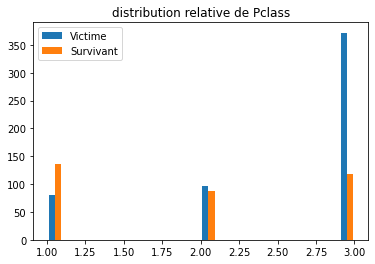

In [71]:
plot_hist('Pclass')

2 conclusions rapides :
* La plupart des victimes étaient en 3ème classe
* 

In [ ]:
test = pd.read_csv('data/test.csv',sep=',')